For this project, I will be creating a model that predicts if a person will pay back their loans. The data used is from LendingClub.com.


We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.The data can be found [here](https://www.lendingclub.com/info/download-data.action).

In [5]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style(style='whitegrid')

In [6]:
#importing the dataset
loans = pd.read_csv('loan_data.csv')

In [7]:
#Getting a feel of the data
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [8]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [9]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [10]:
#Checking for Null Values
loans.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

Let's perform some Exploratory Data Analysis to learn more about the data.

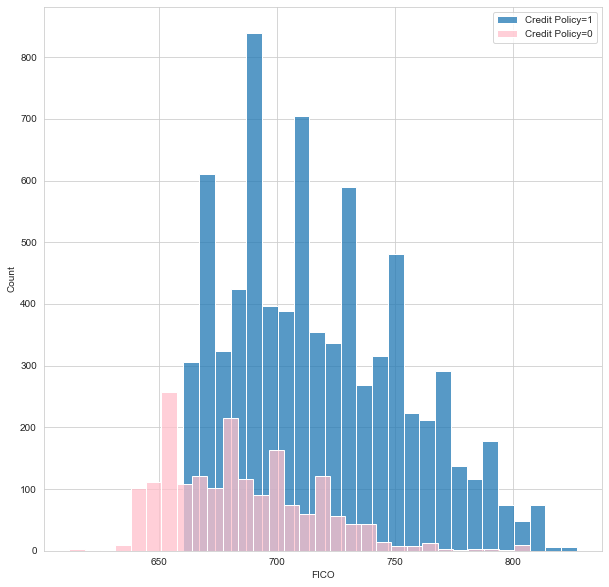

In [16]:
plt.figure(figsize=(10,10))
sns.histplot(loans['fico'][loans['credit.policy']==1], kde=False, bins = 30)
sns.histplot(loans['fico'][loans['credit.policy']==0], kde=False, bins= 30, color = 'pink')
plt.xlabel('FICO')
plt.legend(['Credit Policy=1', 'Credit Policy=0'])
#Credit Score vs whether they meet the LendingClub's Credit Policy

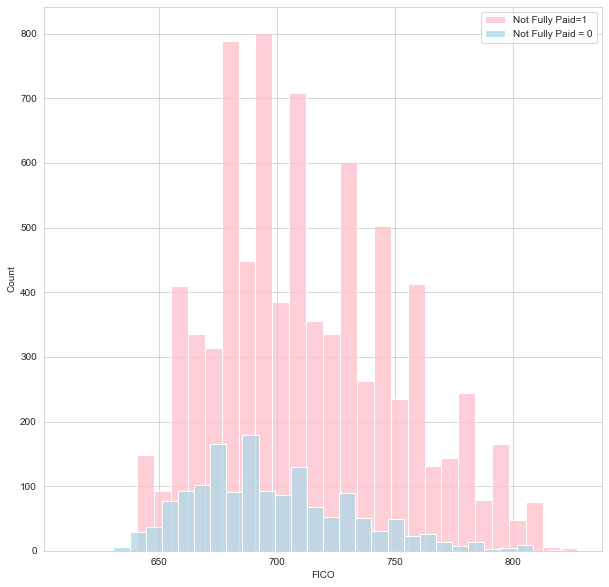

In [22]:
plt.figure(figsize=(10,10))
sns.histplot(loans['fico'][loans['not.fully.paid']==0], kde=False, bins= 30, color='pink')
sns.histplot(loans['fico'][loans['not.fully.paid']==1], kde=False, bins = 30, color='lightblue')
plt.xlabel('FICO')
plt.legend(['Not Fully Paid=1', 'Not Fully Paid = 0'])
#Credit Score vs whether they have fully paid off their loan

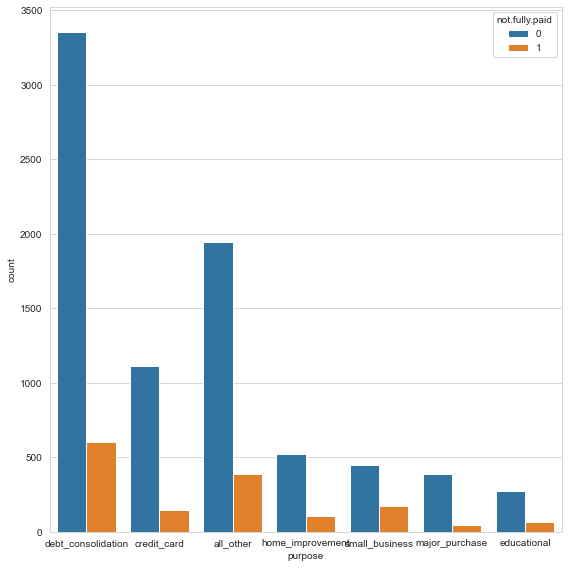

In [23]:
plt.figure(figsize=(8,8))
sns.countplot(data=loans, x='purpose', hue='not.fully.paid')
plt.tight_layout()
#The count of loans by purpose, divided into fully paid or not fully paid

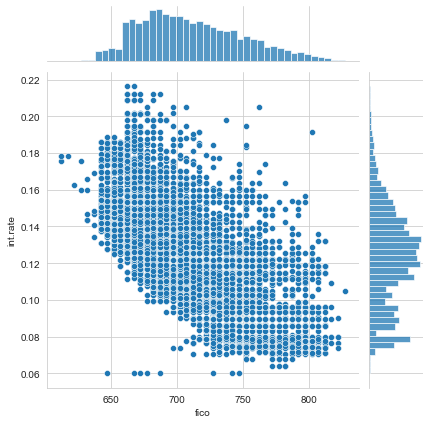

In [25]:
sns.jointplot(data=loans, x='fico', y='int.rate')
#jointplot to explore the relationship between credit score and interest rate. There is a clear negative correlation between the
#two

<Figure size 792x504 with 0 Axes>

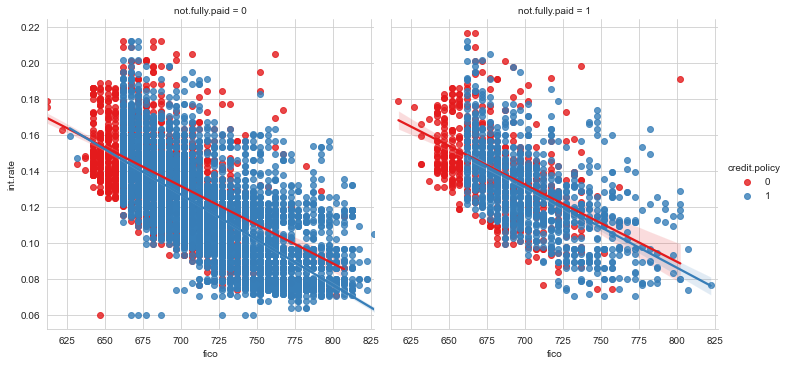

In [27]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1')
#Creating a linear model between interest rate and credit score, divided into if the loan is fully paid off or not.

Now let's create our model.

In [28]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [33]:
#Since purpose is a categorical variable, we must create dummies.
categorical_feats=['purpose']
loans_df = pd.get_dummies(loans,columns=categorical_feats,drop_first=True) 

In [36]:
loans_df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [37]:
from sklearn.model_selection import train_test_split
#Splitting our data into train and test

In [38]:
X=loans_df.drop('not.fully.paid', inplace=False, axis=1)
y=loans_df['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [39]:
#Training our model
from sklearn.tree import DecisionTreeClassifier

In [40]:
dtree = DecisionTreeClassifier()

In [41]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
#predicting test values
predictions = dtree.predict(X_test)

In [43]:
#Checking the performance of our model
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      2650
           1       0.20      0.21      0.21       511

    accuracy                           0.74      3161
   macro avg       0.53      0.53      0.53      3161
weighted avg       0.74      0.74      0.74      3161



[[2226  424]
 [ 402  109]]


Let's try predicting using Random Forests now.

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rfc = RandomForestClassifier()

In [47]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
pred = rfc.predict(X_test)

In [49]:
print(classification_report(y_test, pred))
print('\n')
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2650
           1       0.42      0.02      0.04       511

    accuracy                           0.84      3161
   macro avg       0.63      0.51      0.47      3161
weighted avg       0.77      0.84      0.77      3161



[[2636   14]
 [ 501   10]]


In [ ]:
Clearly the Random Forest Model performed better Decision Tree Model.